# Bitcoin Time Series Anaylsis

### Installing Dependencies

In [1]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plot

In [2]:
# Import the dataset and encode the date
df = pd.read_csv("btc_3m.csv")

In [3]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713017 entries, 0 to 713016
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  713017 non-null  object 
 1   open      713017 non-null  float64
 2   high      713017 non-null  float64
 3   low       713017 non-null  float64
 4   close     713017 non-null  float64
 5   volume    713017 non-null  float64
dtypes: float64(5), object(1)
memory usage: 32.6+ MB


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df_time = df.set_index('datetime')
df_time.head()

,open,high,low,close,volume
datetime,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966


<Axes: xlabel='datetime'>

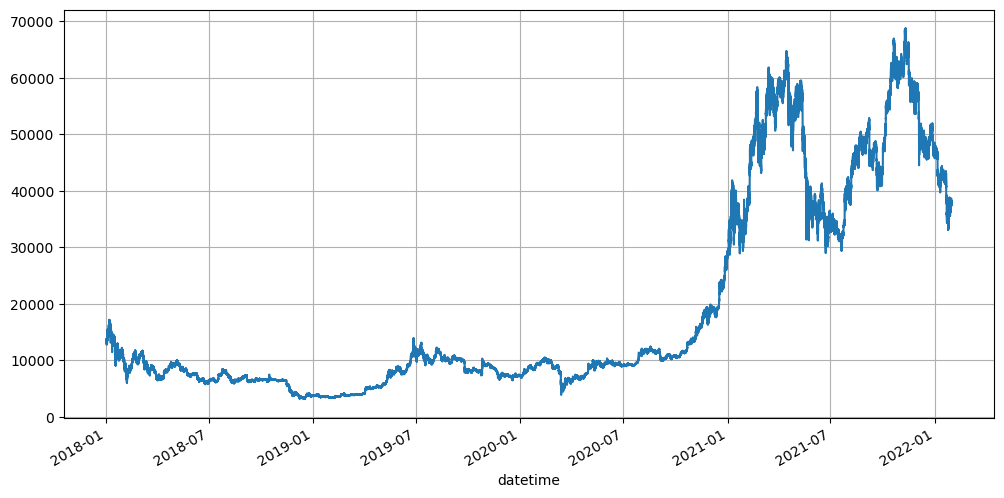

In [7]:
plot.figure(figsize=(12, 6))  
df_time_price = df_time['close']
df_time_price.plot(grid=True)

<Axes: xlabel='datetime'>

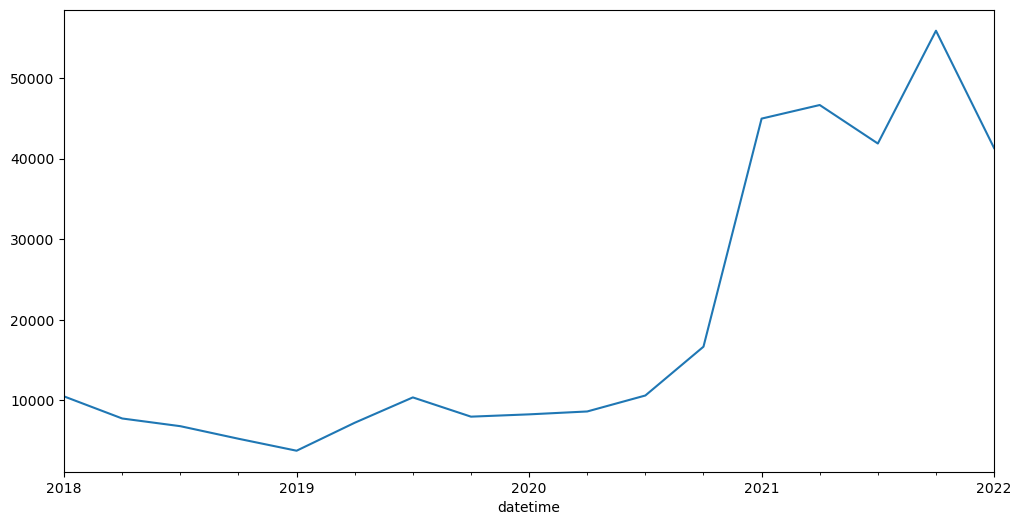

In [8]:
plot.figure(figsize=(12, 6))  
df_time_price.resample('Q').mean().plot()

<Axes: xlabel='datetime'>

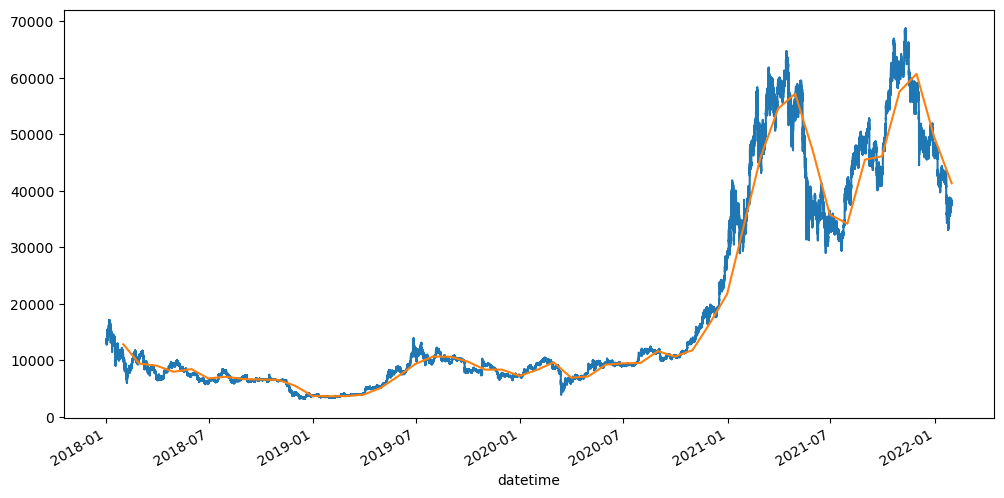

In [9]:
plot.figure(figsize=(12, 6))  
df_time_price.plot()
df_time_price.resample('M').mean().plot()

In [10]:
df_time_price_2018 = pd.DataFrame(df_time['open'].loc['2018-01-01':'2018-12-31'])
df_time_price_2019 =  pd.DataFrame(df_time['open'].loc['2019-01-01':'2019-12-31'])
df_time_price_2020 =  pd.DataFrame(df_time['open'].loc['2020-01-01':'2020-12-31'])
df_time_price_2021 =  pd.DataFrame(df_time['open'].loc['2021-01-01':'2021-12-31'])

In [11]:
df_time_price_2018['Month'] = df_time_price_2018.index.month
df_time_price_2019['Month'] = df_time_price_2019.index.month
df_time_price_2020['Month'] = df_time_price_2020.index.month

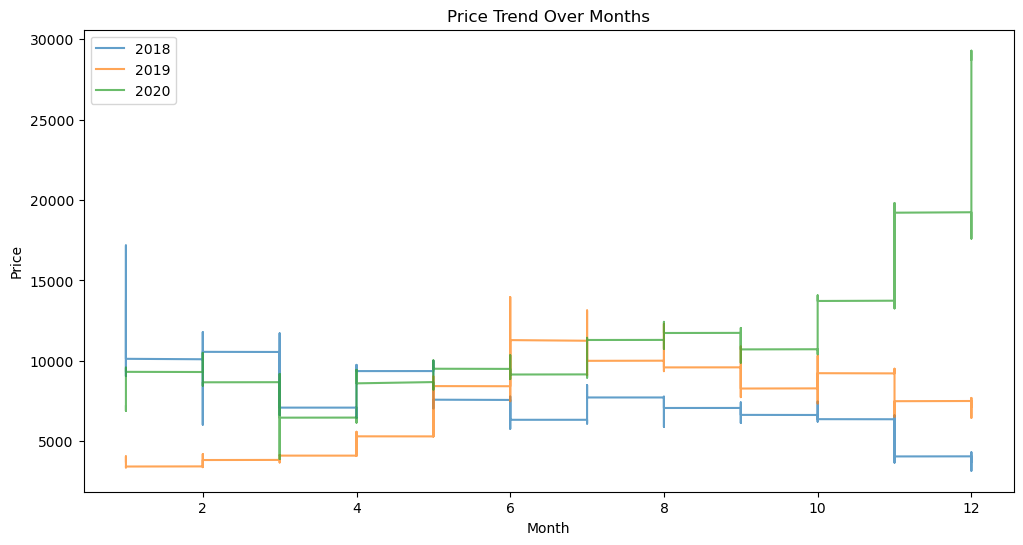

In [12]:
plot.figure(figsize=(12, 6))  

plot.plot(df_time_price_2018['Month'], df_time_price_2018['open'], label='2018', alpha=0.7)
plot.plot(df_time_price_2019['Month'], df_time_price_2019['open'], label='2019', alpha=0.7)
plot.plot(df_time_price_2020['Month'], df_time_price_2020['open'], label='2020', alpha=0.7)

plot.xlabel('Month')
plot.ylabel('Price')
plot.title('Price Trend Over Months')
plot.legend()

plot.show()

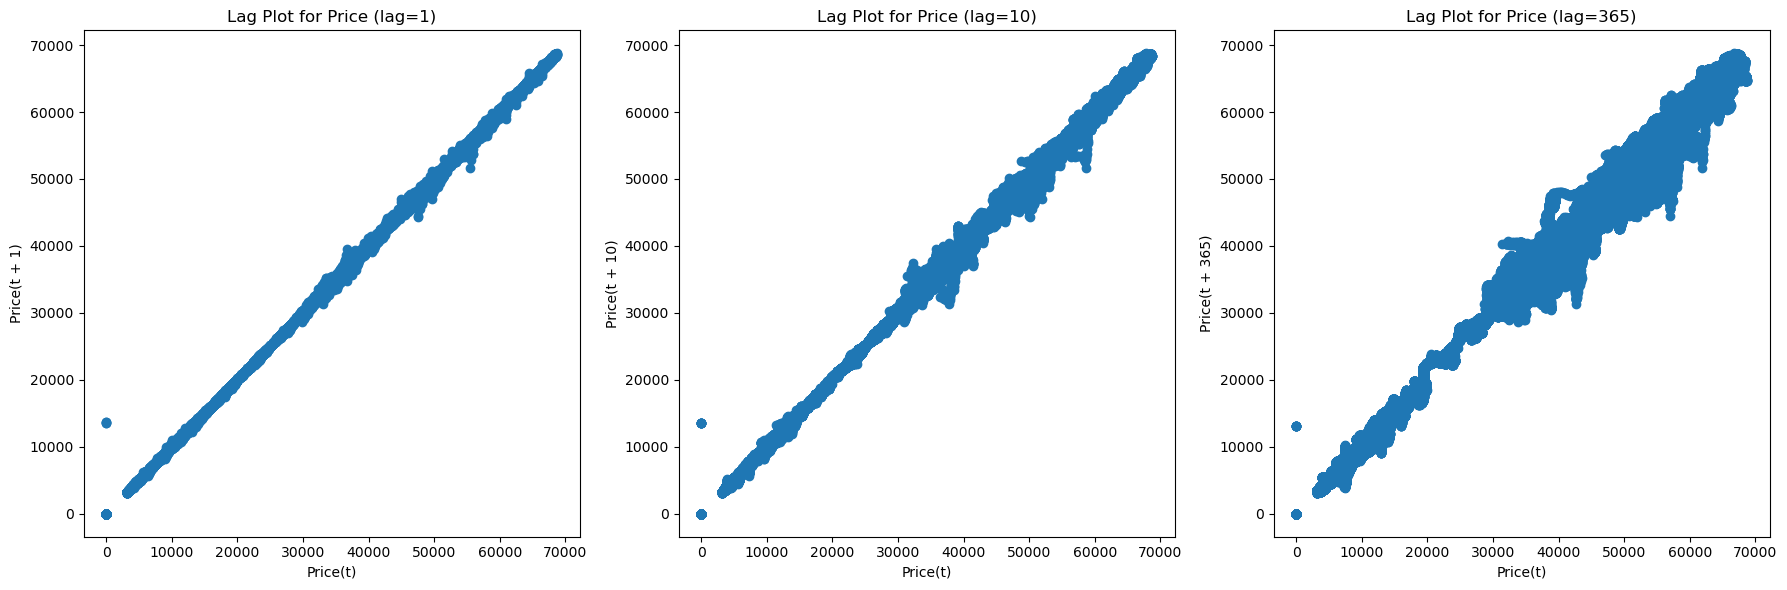

In [167]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Assume df_time_price is your time series data
# df_time_price = ...

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot lag plot with lag=1
lag_plot(df_time_price, lag=1, ax=axes[0])
axes[0].set_xlabel('Price(t)')
axes[0].set_ylabel('Price(t + 1)')
axes[0].set_title('Lag Plot for Price (lag=1)')

# Plot lag plot with lag=10
lag_plot(df_time_price, lag=10, ax=axes[1])
axes[1].set_xlabel('Price(t)')
axes[1].set_ylabel('Price(t + 10)')
axes[1].set_title('Lag Plot for Price (lag=10)')

# Plot lag plot with lag=365
lag_plot(df_time_price, lag=365, ax=axes[2])
axes[2].set_xlabel('Price(t)')
axes[2].set_ylabel('Price(t + 365)')
axes[2].set_title('Lag Plot for Price (lag=365)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()


KeyboardInterrupt: 

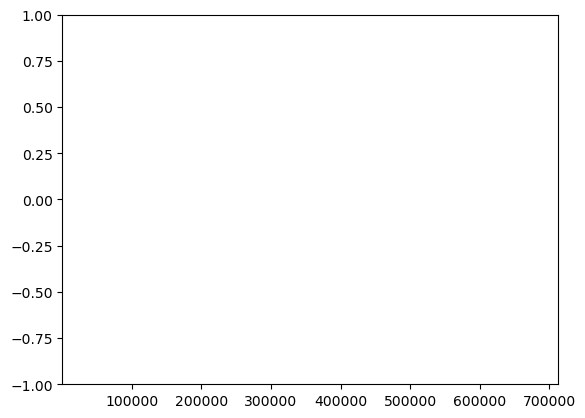

In [169]:
pd.plotting.autocorrelation_plot(df_time_price,verbose = 1)

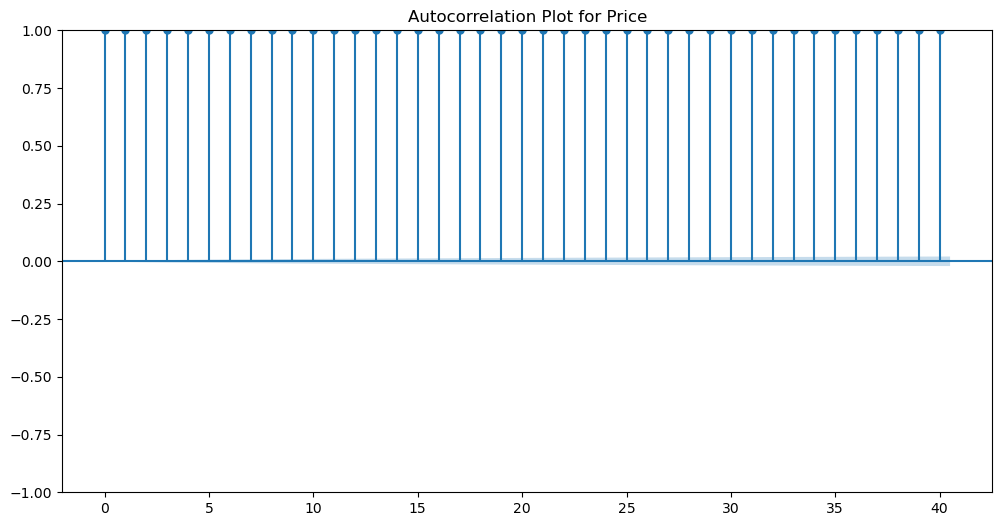

In [171]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Assume df_time_price is your time series data
# df_time_price = ...

# Select the 'price' column
price_column = df_time_price['close']

# Plot ACF using statsmodels
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(price_column, lags=40, ax=ax)  # Adjust the number of lags as needed
ax.set_title('Autocorrelation Plot for Price')

# Show the plot
plt.show()

## Model Performance Metrics 

In [18]:
import pandas as pd
import numpy as np


# Assuming df has columns: 'actual_returns', 'lstm_predictions', 'arima_predictions', 'garch_predictions'
# Replace these columns with the actual columns you have in your dataset.

# # Calculate daily returns
# df['lstm_returns'] = df['lstm_predictions'].pct_change()
# df['arima_returns'] = df['arima_predictions'].pct_change()
# df['garch_returns'] = df['garch_predictions'].pct_change()

# 1. Max Drawdown
# def calculate_max_drawdown(equity_curve):
#     cum_returns = (1 + equity_curve).cumprod()
#     peak = cum_returns.cummax()
#     drawdown = (cum_returns - peak) / peak
#     max_drawdown = drawdown.min()
#     return max_drawdown

In [19]:
# 2. Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    sharpe_ratio = mean_return / std_dev
    return sharpe_ratio

In [22]:
# 3. Net Profit Exceeding Benchmark
# benchmark_returns = df['actual_returns']  # replace with appropriate benchmark
# lstm_net_profit = df['lstm_returns'].sum()
# arima_net_profit = df['arima_returns'].sum()
# garch_net_profit = df['garch_returns'].sum()

# net_profit_exceeding_benchmark_lstm = lstm_net_profit - benchmark_returns.sum()
# net_profit_exceeding_benchmark_arima = arima_net_profit - benchmark_returns.sum()
# net_profit_exceeding_benchmark_garch = garch_net_profit - benchmark_returns.sum()

In [23]:
# 4. Risk-Reward Ratio
def calculate_risk_reward_ratio(returns):
    positive_returns = returns[returns > 0]
    negative_returns = returns[returns < 0]
    average_win = positive_returns.mean()
    average_loss = abs(negative_returns.mean())
    risk_reward_ratio = average_win / average_loss
    return risk_reward_ratio

# Moving Averages

### Simple Moving Average

In [24]:
df_time_price.rolling(window=3).mean()

datetime
2018-01-01 05:30:00             NaN
2018-01-01 05:33:00             NaN
2018-01-01 05:36:00    13607.666667
2018-01-01 05:39:00    13552.753333
2018-01-01 05:42:00    13548.803333
                           ...     
2022-01-31 05:18:00    37923.403333
2022-01-31 05:21:00    37909.713333
2022-01-31 05:24:00    37902.703333
2022-01-31 05:27:00    37899.523333
2022-01-31 05:30:00    37899.630000
Name: close, Length: 713017, dtype: float64

In [25]:
df_time_price = pd.DataFrame(df_time_price)

In [26]:
df_time_price['Price_rolling_3'] = df_time_price['close'].rolling(window=3).mean().shift(1)

In [27]:
df_time_price

,close,Price_rolling_3
datetime,,
2018-01-01 05:30:00,13680.00,NaN
2018-01-01 05:33:00,13568.00,NaN
2018-01-01 05:36:00,13575.00,NaN
2018-01-01 05:39:00,13515.26,13607.666667
2018-01-01 05:42:00,13556.15,13552.753333
...,...,...
2022-01-31 05:18:00,37891.30,37935.526667
2022-01-31 05:21:00,37918.80,37923.403333
2022-01-31 05:24:00,37898.01,37909.713333


<Axes: xlabel='datetime'>

<Figure size 1200x600 with 0 Axes>

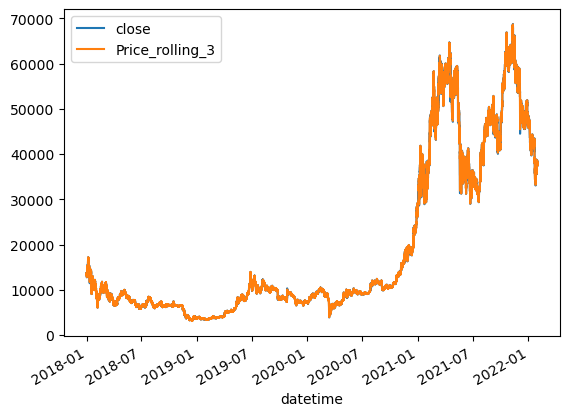

In [28]:
plot.figure(figsize=(12, 6))
df_time_price.plot()

### Weighted Moving Average

In [29]:
def weighted_average(weights):
  def calc(x):
    return (weights * x).mean()
  return calc

In [30]:

df_time_price['Price_weighted_3'] = df_time_price['close'].rolling(window=3).apply(weighted_average(np.array([0.5,1,1.5]))).shift(1)


<Axes: xlabel='datetime'>

<Figure size 1200x600 with 0 Axes>

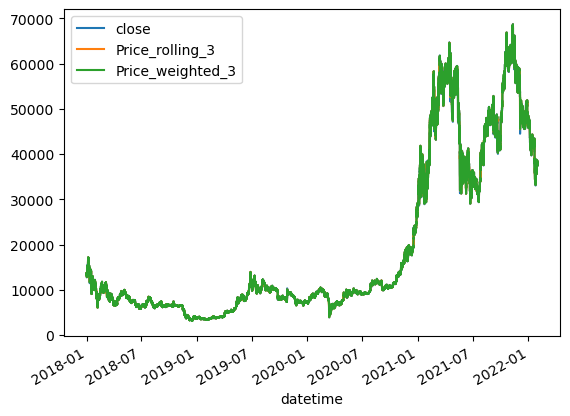

In [31]:
plot.figure(figsize=(12, 6))
df_time_price.plot()

### Exponentially Weighted Moving Average

In [32]:
df_time_price['Price_ewm_3'] = df_time_price['close'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [33]:
df_time_price

,close,Price_rolling_3,Price_weighted_3,Price_ewm_3
datetime,,,,
2018-01-01 05:30:00,13680.00,NaN,NaN,NaN
2018-01-01 05:33:00,13568.00,NaN,NaN,13680.000000
2018-01-01 05:36:00,13575.00,NaN,NaN,13624.000000
2018-01-01 05:39:00,13515.26,13607.666667,13590.166667,13599.500000
2018-01-01 05:42:00,13556.15,13552.753333,13543.963333,13557.380000
...,...,...,...,...
2022-01-31 05:18:00,37891.30,37935.526667,37934.088333,37940.875687
2022-01-31 05:21:00,37918.80,37923.403333,37911.975000,37916.087843
2022-01-31 05:24:00,37898.01,37909.713333,37909.673333,37917.443922


<Axes: xlabel='datetime'>

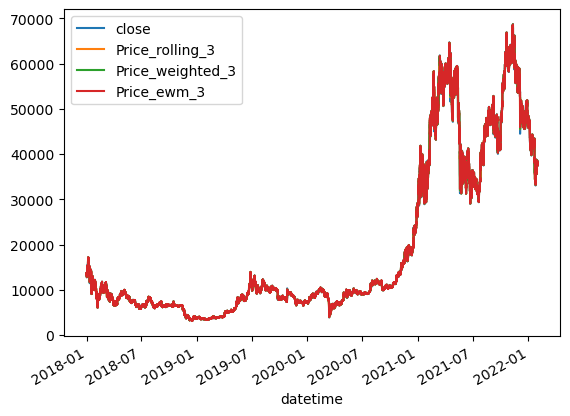

In [34]:
df_time_price.plot()

### Exponentially Smoothing

In [35]:
df_time_price['Price_esm_3'] = df_time_price['close'].ewm(alpha=0.7, adjust=False, min_periods=0).mean().shift(1)

In [36]:
df_time_price

,close,Price_rolling_3,Price_weighted_3,Price_ewm_3,Price_esm_3
datetime,,,,,
2018-01-01 05:30:00,13680.00,NaN,NaN,NaN,NaN
2018-01-01 05:33:00,13568.00,NaN,NaN,13680.000000,13680.000000
2018-01-01 05:36:00,13575.00,NaN,NaN,13624.000000,13601.600000
2018-01-01 05:39:00,13515.26,13607.666667,13590.166667,13599.500000,13582.980000
2018-01-01 05:42:00,13556.15,13552.753333,13543.963333,13557.380000,13535.576000
...,...,...,...,...,...
2022-01-31 05:18:00,37891.30,37935.526667,37934.088333,37940.875687,37930.167431
2022-01-31 05:21:00,37918.80,37923.403333,37911.975000,37916.087843,37902.960229
2022-01-31 05:24:00,37898.01,37909.713333,37909.673333,37917.443922,37914.048069


<Axes: xlabel='datetime'>

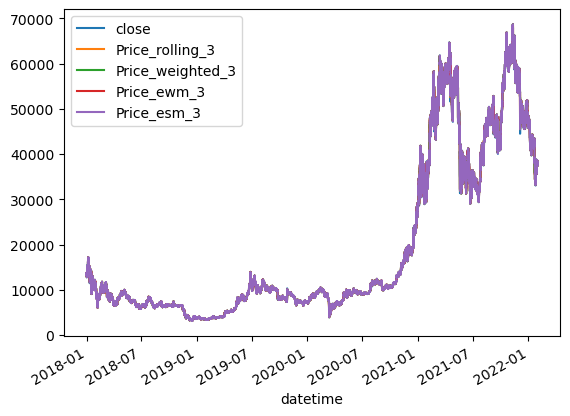

In [37]:
df_time_price.plot()

In [38]:
from sklearn.metrics import mean_squared_error

df_time_price.fillna(0, inplace=True)

mse_rolling = mean_squared_error(df_time_price['close'], df_time_price['Price_rolling_3'])

mse_weighted = mean_squared_error(df_time_price['close'], df_time_price['Price_weighted_3'])

mse_ewm = mean_squared_error(df_time_price['close'], df_time_price['Price_ewm_3'])

mse_esm = mean_squared_error(df_time_price['close'], df_time_price['Price_esm_3'])


print(f"MSE for Price_rolling_3: {mse_rolling}")
print(f"MSE for Price_weighted_3: {mse_weighted}")
print(f"MSE for Price_ewm_3: {mse_ewm}")
print(f"MSE for Price_esm_3: {mse_esm}")

MSE for Price_rolling_3: 5073.326819069532
MSE for Price_weighted_3: 4337.413882101637
MSE for Price_ewm_3: 3936.20541135826
MSE for Price_esm_3: 3344.1845432035516


In [39]:
from sklearn.metrics import r2_score

df_time_price.fillna(0, inplace=True)

r2_rolling = r2_score(df_time_price['close'], df_time_price['Price_rolling_3'])
r2_weighted = r2_score(df_time_price['close'], df_time_price['Price_weighted_3'])
r2_ewm = r2_score(df_time_price['close'], df_time_price['Price_ewm_3'])
r2_esm = r2_score(df_time_price['close'], df_time_price['Price_esm_3'])

# Print results
print(f"R2 score for Price_rolling_3: {r2_rolling}")
print(f"R2 score for Price_weighted_3: {r2_weighted}")
print(f"R2 score for Price_ewm_3: {r2_ewm}")
print(f"R2 score for Price_esm_3: {r2_esm}")

R2 score for Price_rolling_3: 0.9999841140623539
R2 score for Price_weighted_3: 0.9999864184017837
R2 score for Price_ewm_3: 0.999987674692375
R2 score for Price_esm_3: 0.9999895284674091


## Stationary Tests

### KPPS

In [40]:
from statsmodels.tsa.stattools import kpss

In [41]:
from statsmodels.tsa.stattools import kpss

def stationary_test_results(time_series, regression='ct', significance_level=0.05):
    KPPS = kpss(time_series, regression=regression)
    test_statistic, p_value, lags, critical_values = KPPS

    result = "The series is likely non-stationary." if p_value < significance_level else "The series is likely stationary."

    results_dict = {
        'result': result,
        'test_statistic': test_statistic,
        'p_value': p_value,
        'lags': lags,
        'critical_values': critical_values
    }

    return results_dict

In [42]:
result_dict = stationary_test_results(df_time_price['close'])
for key, value in result_dict.items():
    print(f"{key}: {value}")

result: The series is likely non-stationary.
test_statistic: 24.109973700738873
p_value: 0.01
lags: 466
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_35172\3094896873.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPPS = kpss(time_series, regression=regression)


### Augmented Dickey-Fuller (ADF) test

In [43]:
'''from statsmodels.tsa.stattools import adfuller
ADF = adfuller(df_time_price['open'])'''

"from statsmodels.tsa.stattools import adfuller\nADF = adfuller(df_time_price['open'])"

In [44]:
'''test_statistic, p_value, lags, nobs, critical_values, icbest = ADF

print(f"ADF Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Lags: {lags}")
print(f"Number of Observations: {nobs}")
print(f"Critical Values: {critical_values}")
print(f"IC Best: {icbest}")'''

'test_statistic, p_value, lags, nobs, critical_values, icbest = ADF\n\nprint(f"ADF Test Statistic: {test_statistic}")\nprint(f"P-value: {p_value}")\nprint(f"Lags: {lags}")\nprint(f"Number of Observations: {nobs}")\nprint(f"Critical Values: {critical_values}")\nprint(f"IC Best: {icbest}")'

In [45]:
'''if p_value < 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary.")'''

'if p_value < 0.05:\n    print("The series is likely stationary.")\nelse:\n    print("The series is likely non-stationary.")'

In [46]:
df.set_index('datetime', inplace=True)

## Time Series Decomposition

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
result = seasonal_decompose(df_time['close'], model='multiplicative', period=365)

<Figure size 1200x800 with 0 Axes>

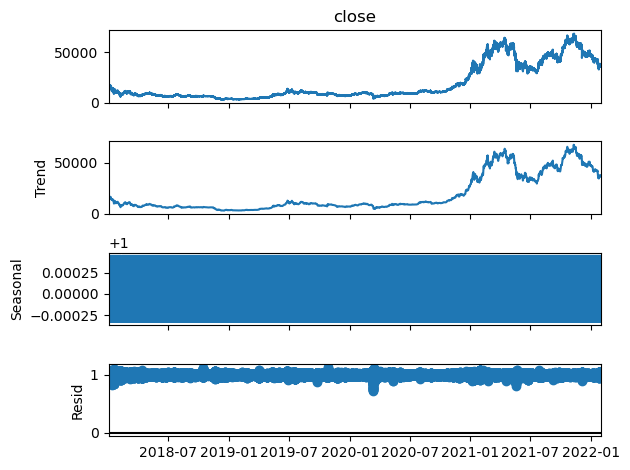

In [58]:
plot.figure(figsize=(12, 8))
resplot = result.plot()

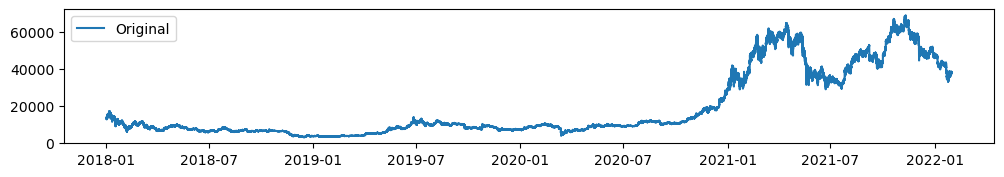

In [59]:
plot.figure(figsize=(12, 8))
plot.subplot(4, 1, 1)
plot.plot(result.observed, label='Original')
plot.legend()

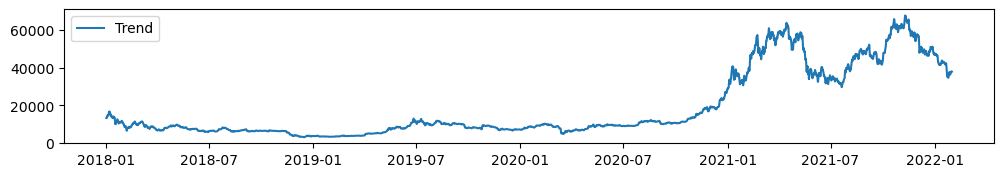

In [61]:
plot.figure(figsize=(12, 8))
plot.subplot(4, 1, 2)
plot.plot(result.trend, label='Trend')
plot.legend()

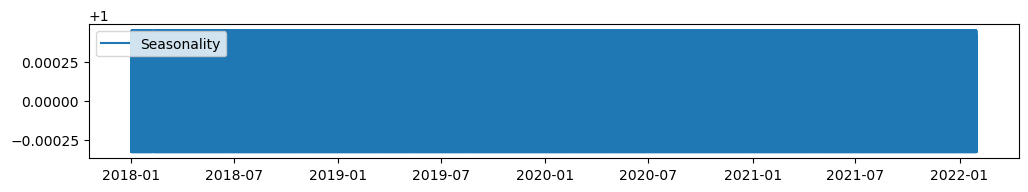

In [62]:
plot.figure(figsize=(12, 8))
plot.subplot(4, 1, 3)
plot.plot(result.seasonal, label='Seasonality')
plot.legend()

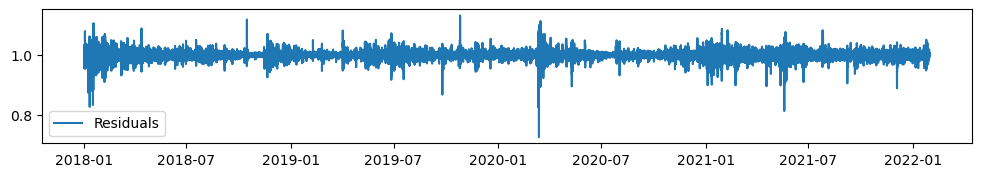

In [64]:
plot.figure(figsize=(12, 8))
plot.subplot(4, 1, 4)
plot.plot(result.resid, label='Residuals')
plot.legend()

<Axes: xlabel='datetime'>

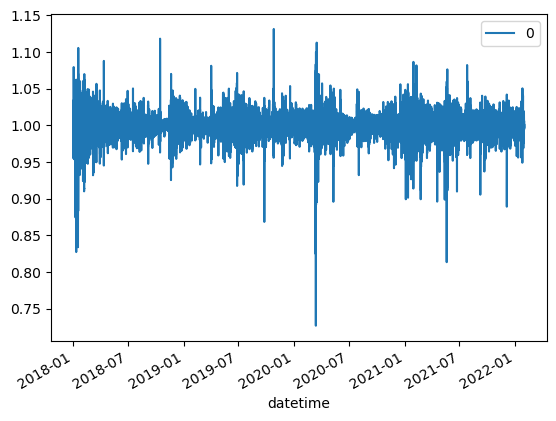

In [65]:
pd.DataFrame(result.observed/result.trend).plot() 

## Data Cleaning

### Log Transformation

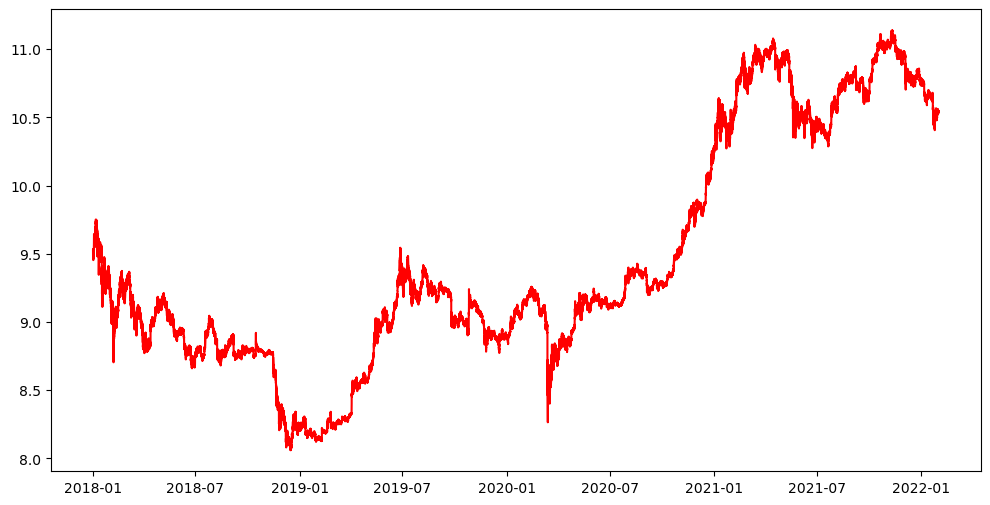

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_35172\3094896873.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPPS = kpss(time_series, regression=regression)


{'result': 'The series is likely non-stationary.',
 'test_statistic': 22.77632239778578,
 'p_value': 0.01,
 'lags': 466,
 'critical_values': {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}}

In [66]:
plot.figure(figsize=(12, 6))
price_log = np.log(df_time_price['close'])
plot.plot(price_log,color="red")
plot.show()

stationary_test_results(price_log)

### Remove trend and seasonality with differencing

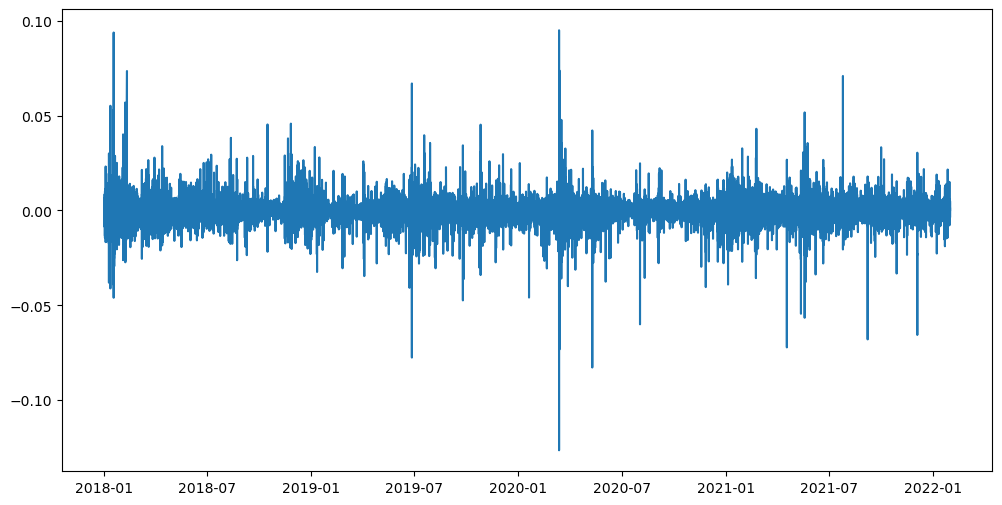

In [67]:
plot.figure(figsize=(12, 6))
price_log_diff = price_log - price_log.shift()
plot.plot(price_log_diff)
plot.show()

In [68]:
price_log_diff.dropna(inplace=True)

In [69]:
price_log_diff

datetime
2018-01-01 05:33:00   -0.008221
2018-01-01 05:36:00    0.000516
2018-01-01 05:39:00   -0.004410
2018-01-01 05:42:00    0.003021
2018-01-01 05:45:00   -0.008603
                         ...   
2022-01-31 05:18:00   -0.000732
2022-01-31 05:21:00    0.000725
2022-01-31 05:24:00   -0.000548
2022-01-31 05:27:00   -0.000429
2022-01-31 05:30:00    0.000986
Name: close, Length: 713016, dtype: float64

In [70]:
stationary_test_results(price_log_diff)

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_35172\3094896873.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPPS = kpss(time_series, regression=regression)


{'result': 'The series is likely stationary.',
 'test_statistic': 0.11321470174326977,
 'p_value': 0.1,
 'lags': 64,
 'critical_values': {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}}

### Auto Regressive model

In [130]:
from statsmodels.tsa.arima.model import ARIMA

In [131]:
df_train = Real_Price[Real_Price.index < '2021-01-01']
df_test = Real_Price[Real_Price.index >= '2021-01-01']

In [134]:
df_train

datetime
2018-01-01 05:30:00    13715.65
2018-01-01 05:33:00    13679.98
2018-01-01 05:36:00    13568.00
2018-01-01 05:39:00    13539.99
2018-01-01 05:42:00    13515.26
                         ...   
2020-12-31 23:45:00    28655.51
2020-12-31 23:48:00    28669.04
2020-12-31 23:51:00    28647.87
2020-12-31 23:54:00    28739.02
2020-12-31 23:57:00    28735.69
Name: open, Length: 523636, dtype: float64

In [132]:
df_test

datetime
2021-01-01 00:00:00    28749.00
2021-01-01 00:03:00    28732.01
2021-01-01 00:06:00    28741.17
2021-01-01 00:09:00    28747.86
2021-01-01 00:12:00    28743.87
                         ...   
2022-01-31 05:18:00    37919.05
2022-01-31 05:21:00    37891.30
2022-01-31 05:24:00    37918.79
2022-01-31 05:27:00    37898.02
2022-01-31 05:30:00    37881.75
Name: open, Length: 189381, dtype: float64

In [144]:
model = ARIMA(np.log(df_train), order=(2, 1, 0))
results_ARIMA = model.fit()

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHUBHAM\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHUBHAM\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [145]:
predictions = results_ARIMA.forecast(steps=len(df_test))

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SHUBHAM\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [146]:
# Reverse the log transformation for both test and predictions
predictions_actual = np.exp(predictions)

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [147]:
predictions_actual

523636    28733.990281
523637    28734.100680
523638    28734.131043
523639    28734.128073
523640    28734.127557
              ...     
713012    28734.127635
713013    28734.127635
713014    28734.127635
713015    28734.127635
713016    28734.127635
Name: predicted_mean, Length: 189381, dtype: float64

In [148]:
arima_mse = mean_squared_error(df_test, predictions_actual)
print(f'Mean Squared Error (MSE): {arima_mse}')

Mean Squared Error (MSE): 422274069.97341585


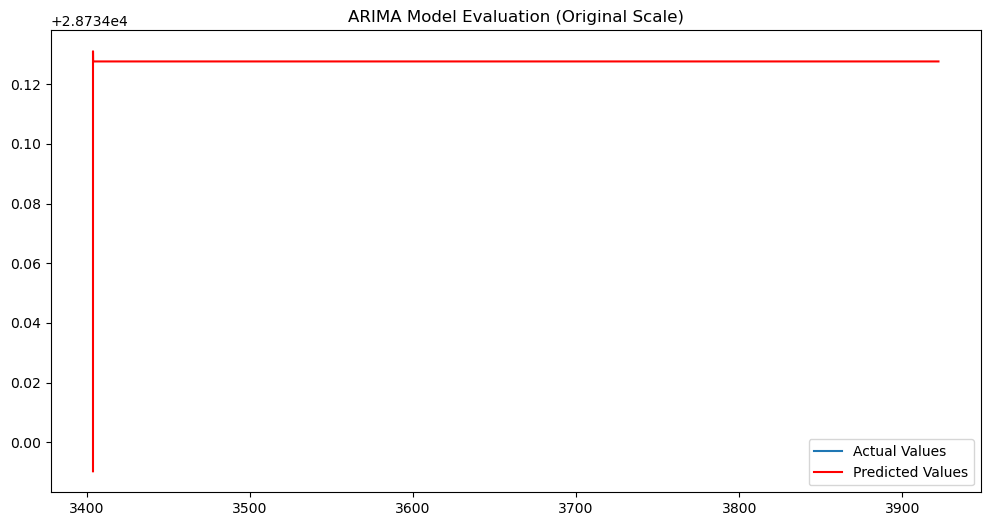

In [149]:
# Visualize the results in the original scale
plot.figure(figsize=(12, 6))
plot.plot(df_test, label='Actual Values')
plot.plot(predictions_actual, color='red', label='Predicted Values')
plot.title('ARIMA Model Evaluation (Original Scale)')
plot.legend()
plot.show()

In [164]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product
import pandas as pd
import statsmodels.api as sm
import warnings

In [218]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 2)
Ps = range(0, 2)
ps = range(0, 2)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_train, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

MemoryError: Unable to allocate 783. MiB for an array with shape (14, 14, 523637) and data type float64

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

## LSTM To Predict Bitcoin Prices

In [80]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd
import pickle
from matplotlib import pyplot as plt

In [81]:
# Import the dataset and encode the date
data = pd.read_csv("btc_3m.csv")

In [82]:
data.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966


In [83]:
data['datetime'] = pd.to_datetime(data['datetime'])
group = data.groupby('datetime')
Real_Price = group['open'].mean()

In [84]:
df_train = Real_Price[Real_Price.index < '2021-01-01']
df_test = Real_Price[Real_Price.index >= '2021-01-01']

In [85]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [86]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

regressor = Sequential()

regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))

regressor.add(LSTM(units=50, activation='relu'))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model to the training data
regressor.fit(X_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
104727/104727 [==============================] - 222s 2ms/step - loss: 6.3452e-05
Epoch 2/10
104727/104727 [==============================] - 218s 2ms/step - loss: 2.3085e-06
Epoch 3/10
104727/104727 [==============================] - 214s 2ms/step - loss: 2.1897e-06
Epoch 4/10
104727/104727 [==============================] - 226s 2ms/step - loss: 2.0240e-06
Epoch 5/10
104727/104727 [==============================] - 216s 2ms/step - loss: 1.9866e-06
Epoch 6/10
104727/104727 [==============================] - 220s 2ms/step - loss: 1.8981e-06
Epoch 7/10
104727/104727 [==============================] - 235s 2ms/step - loss: 1.8652e-06
Epoch 8/10
104727/104727 [==============================] - 231s 2ms/step - loss: 1.8741e-06
Epoch 9/10
104727/104727 [==============================] - 223s 2ms/step - loss: 1.8042e-06
Epoch 10/10
104727/104727 [==============================] - 229s 2ms/step - loss: 1.7724e-06


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(df_train, predicted_BTC_price)
print(f'Mean Squared Error (MSE): {mse}')

r2 = r2_score(df_train, predicted_BTC_price)
print(f'R-squared (R2) Score: {r2}')

In [87]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

5919/5919 [==============================] - 11s 2ms/step


In [88]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(df_test, predicted_BTC_price)
print(f'Mean Squared Error (MSE): {mse}')

r2 = r2_score(df_test, predicted_BTC_price)
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 2185032.8052664627
R-squared (R2) Score: 0.9764751345396041


In [89]:
df_test = pd.DataFrame(df_test)
df_test

,open
datetime,
2021-01-01 00:00:00,28749.00
2021-01-01 00:03:00,28732.01
2021-01-01 00:06:00,28741.17
2021-01-01 00:09:00,28747.86
2021-01-01 00:12:00,28743.87
...,...
2022-01-31 05:18:00,37919.05
2022-01-31 05:21:00,37891.30
2022-01-31 05:24:00,37918.79


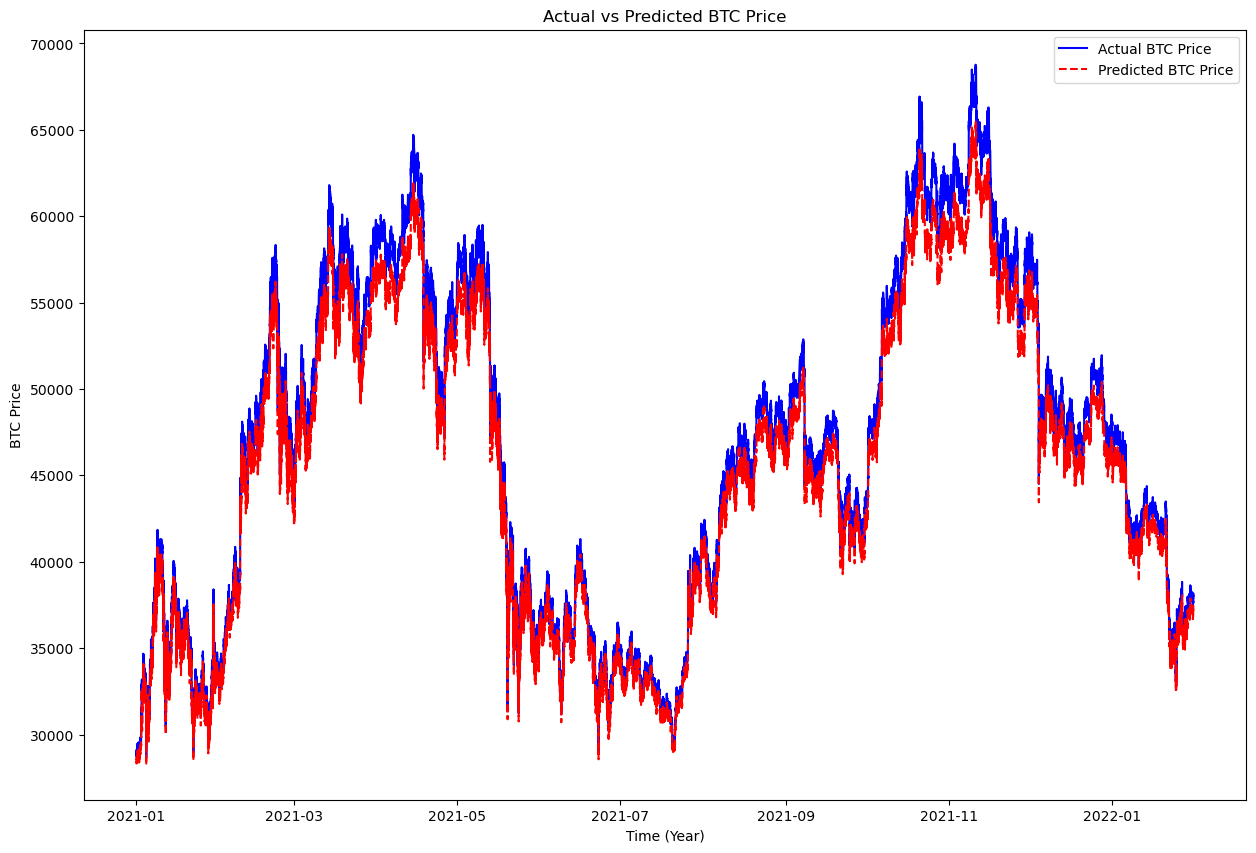

In [90]:

plt.figure(figsize=(15, 10))
plt.plot(df_test.index, df_test, label='Actual BTC Price', color='blue')
plt.plot(df_test.index, predicted_BTC_price, label='Predicted BTC Price', color='red', linestyle='dashed')
plt.title('Actual vs Predicted BTC Price')
plt.xlabel('Time (Year)')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

In [91]:
from tensorflow.keras.models import load_model, save_model

# Save the model
save_model(regressor, 'lstm_model_2_10.h5')

# Load the model
loaded_regressor = load_model('lstm_model_2_10.h5')

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_35172\2744343849.py:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(regressor, 'lstm_model_2_10.h5')


In [190]:
import pandas as pd
import numpy as np

# Assuming predicted_BTC_price is a multi-dimensional array
flat_actual_BTC_price = np.ravel(df_test)

# Create a new DataFrame with a column 'lstm_returns'
actual_df = pd.DataFrame({'lstm_returns': flat_actual_BTC_price})

# Add the percentage change to the new DataFrame
actual_df['lstm_returns_pct_change'] = new_df['lstm_returns'].pct_change()

# Display the new DataFrame
print(actual_df)

        lstm_returns  lstm_returns_pct_change
0           28749.00                      NaN
1           28732.01                -0.000587
2           28741.17                 0.000317
3           28747.86                 0.000231
4           28743.87                -0.000138
...              ...                      ...
189376      37919.05                -0.001048
189377      37891.30                -0.000713
189378      37918.79                 0.000707
189379      37898.02                -0.000534
189380      37881.75                -0.000419

[189381 rows x 2 columns]


In [191]:
actual_df.fillna(0)

,lstm_returns,lstm_returns_pct_change
0,28749.00,0.000000
1,28732.01,-0.000587
2,28741.17,0.000317
3,28747.86,0.000231
4,28743.87,-0.000138
...,...,...
189376,37919.05,-0.001048
189377,37891.30,-0.000713
189378,37918.79,0.000707
189379,37898.02,-0.000534


In [178]:
import pandas as pd
import numpy as np

# Assuming predicted_BTC_price is a multi-dimensional array
flat_predicted_BTC_price = np.ravel(predicted_BTC_price)

# Create a new DataFrame with a column 'lstm_returns'
new_df = pd.DataFrame({'lstm_returns': flat_predicted_BTC_price})

# Add the percentage change to the new DataFrame
new_df['lstm_returns_pct_change'] = new_df['lstm_returns'].pct_change()

# Display the new DataFrame
print(new_df)

        lstm_returns  lstm_returns_pct_change
0       28342.615234                      NaN
1       28325.968750                -0.000587
2       28334.943359                 0.000317
3       28341.498047                 0.000231
4       28337.585938                -0.000138
...              ...                      ...
189376  37192.371094                -0.001048
189377  37165.839844                -0.000713
189378  37192.121094                 0.000707
189379  37172.269531                -0.000534
189380  37156.710938                -0.000419

[189381 rows x 2 columns]


In [180]:
new_df.fillna(0)

,lstm_returns,lstm_returns_pct_change
0,28342.615234,0.000000
1,28325.968750,-0.000587
2,28334.943359,0.000317
3,28341.498047,0.000231
4,28337.585938,-0.000138
...,...,...
189376,37192.371094,-0.001048
189377,37165.839844,-0.000713
189378,37192.121094,0.000707
189379,37172.269531,-0.000534


In [184]:
def calculate_max_drawdown(equity_curve):
    cum_returns = np.cumprod(1 + equity_curve)
    peak = np.maximum.accumulate(cum_returns)
    drawdown = (cum_returns - peak) / peak
    max_drawdown = np.min(drawdown)
    return max_drawdown

In [186]:
max_drawdown = calculate_max_drawdown(predicted_BTC_price)
print(f"Max Drawdown: {max_drawdown}")

Max Drawdown: nan


In [187]:
calculate_sharpe_ratio(new_df['lstm_returns_pct_change'])

0.0017427672583647316

In [189]:
calculate_risk_reward_ratio(new_df['lstm_returns_pct_change'])

1.0111767

In [205]:
benchmark_returns = actual_df['lstm_returns_pct_change']
lstm_net_profit = new_df['lstm_returns_pct_change'].sum()

In [206]:
print("LSTM Net Profit:", lstm_net_profit)
print("Sum of Benchmark Returns:", benchmark_returns.sum())

LSTM Net Profit: 0.7134609
Sum of Benchmark Returns: 0.7134609


In [207]:
net_profit_exceeding_benchmark_lstm = lstm_net_profit - benchmark_returns.sum()

In [208]:
net_profit_exceeding_benchmark_lstm

0.0

In [ ]:
df['trade_duration'] = df['trade_end_time'] - df['trade_start_time']

In [ ]:
max_duration_lstm = df['trade_duration'].max()

## Risk Management

In [95]:
from arch import arch_model

In [96]:
df_time_price['BTC_return'] = df_time_price['close'].pct_change()

In [97]:
df_time_price['BTC_squared_return'] = df_time_price['BTC_return']**2

In [98]:
df_time_price.fillna(0, inplace=True)

In [99]:
model = arch_model(df_time_price['BTC_squared_return'], vol='Garch', p=1, q=1)

In [100]:
results = model.fit()

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.058e-09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: -6917264.940834869
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -6917264.942680874
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1


C:\Users\SHUBHAM\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [101]:
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:     BTC_squared_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:            6.91726e+06
Distribution:                  Normal   AIC:                      -1.38345e+07
Method:            Maximum Likelihood   BIC:                      -1.38345e+07
                                        No. Observations:               713017
Date:                Fri, Jan 12 2024   Df Residuals:                   713016
Time:                        19:21:26   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.3408e-06  7.416e-09    585.299      0.000 [4.

<Figure size 1600x1000 with 0 Axes>

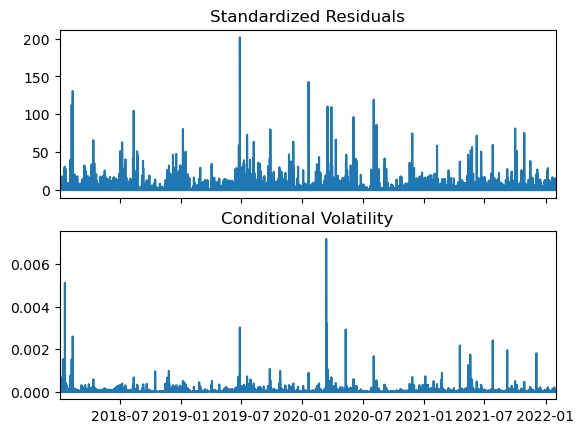

In [102]:
plot.figure(figsize=(16, 10))
results.plot()

plot.show()

In [103]:
garch_forecast = np.sqrt(results.conditional_volatility)

In [108]:
df_time_price["garch_forecast"]= garch_forecast

In [109]:
df_time_price

,close,Price_rolling_3,Price_weighted_3,Price_ewm_3,Price_esm_3,BTC_return,BTC_squared_return,garch_forecast
datetime,,,,,,,,
2018-01-01 05:30:00,13680.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.005005
2018-01-01 05:33:00,13568.00,0.000000,0.000000,13680.000000,13680.000000,-0.008187,6.702917e-05,0.004808
2018-01-01 05:36:00,13575.00,0.000000,0.000000,13624.000000,13601.600000,0.000516,2.661733e-07,0.005939
2018-01-01 05:39:00,13515.26,13607.666667,13590.166667,13599.500000,13582.980000,-0.004401,1.936648e-05,0.005644
2018-01-01 05:42:00,13556.15,13552.753333,13543.963333,13557.380000,13535.576000,0.003025,9.153463e-06,0.005443
...,...,...,...,...,...,...,...,...
2022-01-31 05:18:00,37891.30,37935.526667,37934.088333,37940.875687,37930.167431,-0.000732,5.351780e-07,0.003765
2022-01-31 05:21:00,37918.80,37923.403333,37911.975000,37916.087843,37902.960229,0.000726,5.267280e-07,0.003764
2022-01-31 05:24:00,37898.01,37909.713333,37909.673333,37917.443922,37914.048069,-0.000548,3.006075e-07,0.003764


<Axes: xlabel='datetime'>

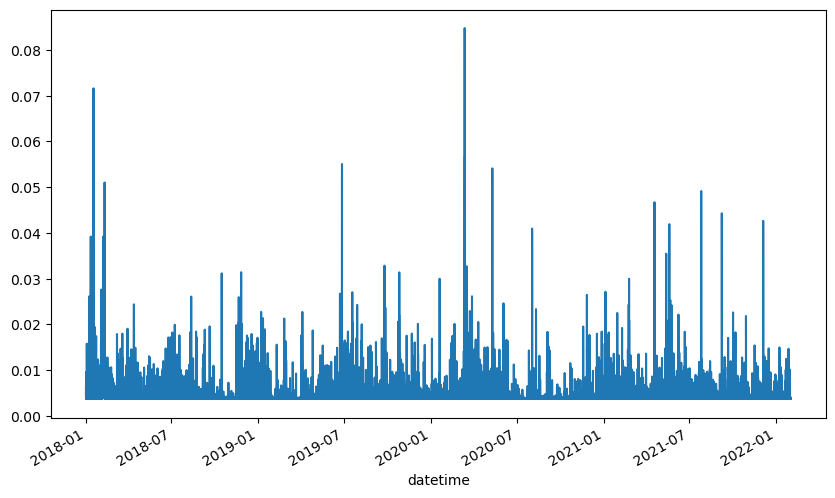

In [110]:
plot.figure(figsize=(10, 6))
garch_forecast.plot()

In [111]:
lstm_data = df_time_price[['BTC_return', 'BTC_squared_return', 'garch_forecast']]

In [112]:
lstm_data['GARCH_volatility'] = garch_forecast.shift(1)

lstm_data = lstm_data.dropna()

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_35172\51259276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_data['GARCH_volatility'] = garch_forecast.shift(1)


In [114]:
# Define LSTM input features and target variable
X = lstm_data[['BTC_return', 'BTC_squared_return', 'garch_forecast']].values
y = lstm_data['GARCH_volatility'].values

In [115]:
train_size = int(len(lstm_data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [116]:
# Normalize the data if needed
# StandardScaler can be used from sklearn.preprocessing

In [117]:
# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [118]:
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
17826/17826 - 45s - loss: 2.7119e-07 - val_loss: 1.4774e-07 - 45s/epoch - 3ms/step
Epoch 2/10
17826/17826 - 142s - loss: 1.9138e-07 - val_loss: 3.4585e-07 - 142s/epoch - 8ms/step
Epoch 3/10
17826/17826 - 198s - loss: 1.8613e-07 - val_loss: 1.4666e-07 - 198s/epoch - 11ms/step
Epoch 4/10
17826/17826 - 195s - loss: 1.8265e-07 - val_loss: 1.3612e-07 - 195s/epoch - 11ms/step
Epoch 5/10
17826/17826 - 175s - loss: 1.8109e-07 - val_loss: 1.3990e-07 - 175s/epoch - 10ms/step
Epoch 6/10
17826/17826 - 165s - loss: 1.8155e-07 - val_loss: 1.3536e-07 - 165s/epoch - 9ms/step
Epoch 7/10
17826/17826 - 165s - loss: 1.8028e-07 - val_loss: 1.4525e-07 - 165s/epoch - 9ms/step
Epoch 8/10
17826/17826 - 166s - loss: 1.7704e-07 - val_loss: 1.4408e-07 - 166s/epoch - 9ms/step
Epoch 9/10
17826/17826 - 155s - loss: 1.7693e-07 - val_loss: 1.6854e-07 - 155s/epoch - 9ms/step
Epoch 10/10
17826/17826 - 148s - loss: 1.7566e-07 - val_loss: 1.5182e-07 - 148s/epoch - 8ms/step


In [119]:
# Predict volatility using the LSTM model
lstm_forecast = model.predict(X_test)

4457/4457 [==============================] - 39s 8ms/step


In [125]:
# Combine GARCH and LSTM forecasts (you can adjust the weights based on performance)
combined_forecast = 0.5 * garch_forecast[X_test.shape[0]] + 0.5 * lstm_forecast.flatten()

In [126]:
combined_forecast

array([0.00383713, 0.00383857, 0.00384144, ..., 0.00384028, 0.00384103,
       0.00384347], dtype=float32)

In [ ]:
# Visualize the results or use them for risk management decisions

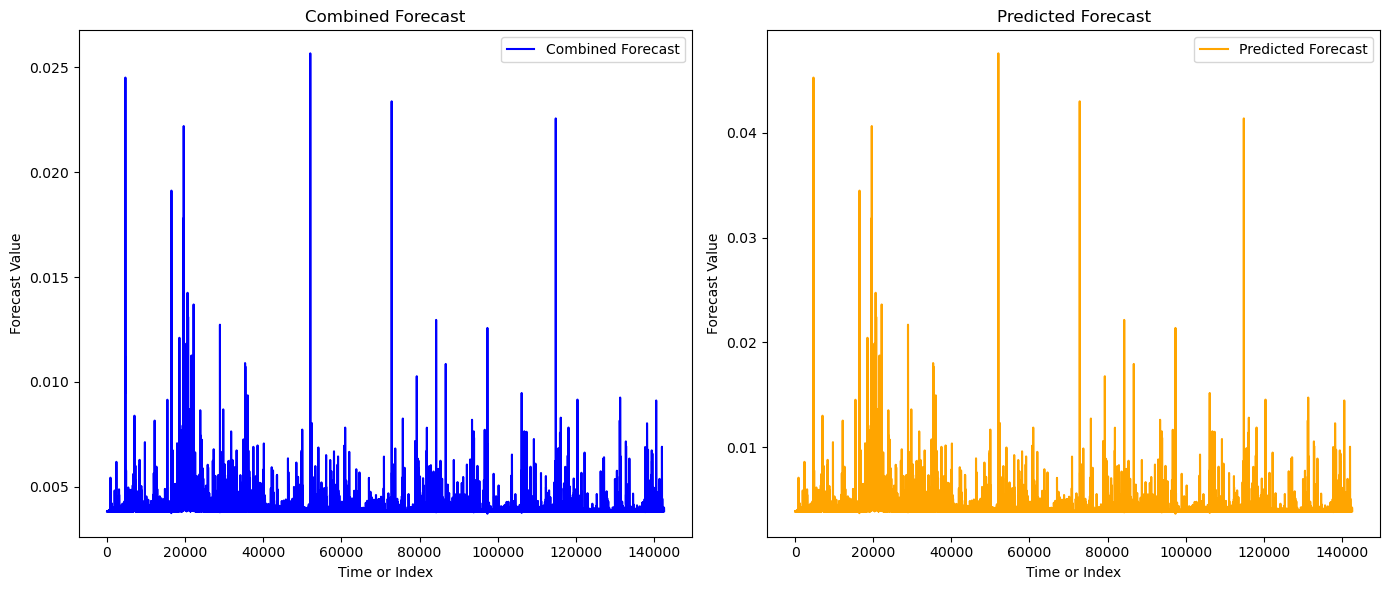

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following arrays or pandas Series
# combined_forecast and predicted_forecast are placeholders; replace them with your actual data
# For example:
# combined_forecast = np.array([your_combined_forecast_data])
# predicted_forecast = np.array([your_predicted_forecast_data])

# Create a time or index array if you have one
time_array = np.arange(len(combined_forecast))

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the combined forecast in the first subplot
axs[0].plot(time_array, combined_forecast, label='Combined Forecast', color='blue')
axs[0].set_xlabel('Time or Index')
axs[0].set_ylabel('Forecast Value')
axs[0].set_title('Combined Forecast')
axs[0].legend()

# Plot the predicted forecast in the second subplot
axs[1].plot(time_array, lstm_forecast, label='Predicted Forecast', color='orange')
axs[1].set_xlabel('Time or Index')
axs[1].set_ylabel('Forecast Value')
axs[1].set_title('Predicted Forecast')
axs[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()